In [1]:
# Import necessary libraries and suppress warnings
import warnings
warnings.filterwarnings('ignore')  

import numpy as np
import pandas as pd

# Set up matplotlib with Agg backend for non-interactive plotting
import matplotlib
matplotlib.use('Agg')

import matplotlib.pyplot as plt
plt.switch_backend('Agg')

# Ensure inline plotting works on Kaggle
%matplotlib inline

import seaborn as sns
sns.set(style="whitegrid")

# For predictive modeling
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import LabelEncoder

# Print a note to the future self if debugging
print("Imports complete. Ready to rock the data.")

Imports complete. Ready to rock the data.


In [3]:
# Load the dataset
# The data is assumed to be in the same directory under /kaggle/input/fertilizer-recommendation/
data_path = 'fertilizer_recommendation_dataset.csv'

try:
    df = pd.read_csv(data_path, encoding='ascii', delimiter=',')
    print("Data loaded successfully. Dataset shape:", df.shape)
except Exception as e:
    print("An error occurred while loading the dataset:", e)
    # If file loading error occurs, double-check the file path and permissions.

Data loaded successfully. Dataset shape: (3100, 12)


In [4]:
# Display the first few rows of the dataframe
df.head()

,Temperature,Moisture,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon,Soil,Crop,Fertilizer,Remark
0,50.179845,0.725893,205.600816,6.227358,66.701872,76.963560,96.429065,0.496300,Loamy Soil,rice,Compost,Enhances organic matter and improves soil stru...
1,21.633318,0.721958,306.081601,7.173131,71.583316,163.057636,148.128347,1.234242,Loamy Soil,rice,Balanced NPK Fertilizer,"Provides a balanced mix of nitrogen, phosphoru..."
2,23.060964,0.685751,259.336414,7.380793,75.709830,62.091508,80.308971,1.795650,Peaty Soil,rice,Water Retaining Fertilizer,Improves water retention in dry soils. Prefer ...
3,26.241975,0.755095,212.703513,6.883367,78.033687,151.012521,153.005712,1.517556,Loamy Soil,rice,Balanced NPK Fertilizer,"Provides a balanced mix of nitrogen, phosphoru..."
4,21.490157,0.730672,268.786767,7.578760,71.765123,66.257371,97.000886,1.782985,Peaty Soil,rice,Organic Fertilizer,"Enhances fertility naturally, ideal for peaty ..."


In [5]:
# Get a summary of the dataframe
print("Summary of the dataframe: ")
print(df.info())

# Basic statistics for numeric features
display(df.describe())

Summary of the dataframe: 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3100 entries, 0 to 3099
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Temperature  3100 non-null   float64
 1   Moisture     3100 non-null   float64
 2   Rainfall     3100 non-null   float64
 3   PH           3100 non-null   float64
 4   Nitrogen     3100 non-null   float64
 5   Phosphorous  3100 non-null   float64
 6   Potassium    3100 non-null   float64
 7   Carbon       3100 non-null   float64
 8   Soil         3100 non-null   object 
 9   Crop         3100 non-null   object 
 10  Fertilizer   3100 non-null   object 
 11  Remark       3100 non-null   object 
dtypes: float64(8), object(4)
memory usage: 290.8+ KB
None


,Temperature,Moisture,Rainfall,PH,Nitrogen,Phosphorous,Potassium,Carbon
count,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000,3100.000000
mean,27.271096,0.600763,111.024949,6.379775,61.278480,69.582850,69.721167,1.474325
std,9.114450,0.144947,77.151880,0.957103,10.186410,42.226712,35.304241,0.698300
min,4.011486,0.227436,-85.709593,3.448974,35.527718,-37.649739,-20.509108,-0.280560
25%,22.408505,0.493595,61.283985,5.860489,54.835715,43.039260,49.992405,0.956401
50%,26.132938,0.599520,96.485935,6.337308,59.429649,58.205269,58.710808,1.463357
75%,29.987887,0.708575,147.619401,6.899739,65.792790,86.108983,76.318626,2.003534
max,56.653592,0.972361,411.955947,9.562341,98.581039,177.314481,161.067982,3.241984


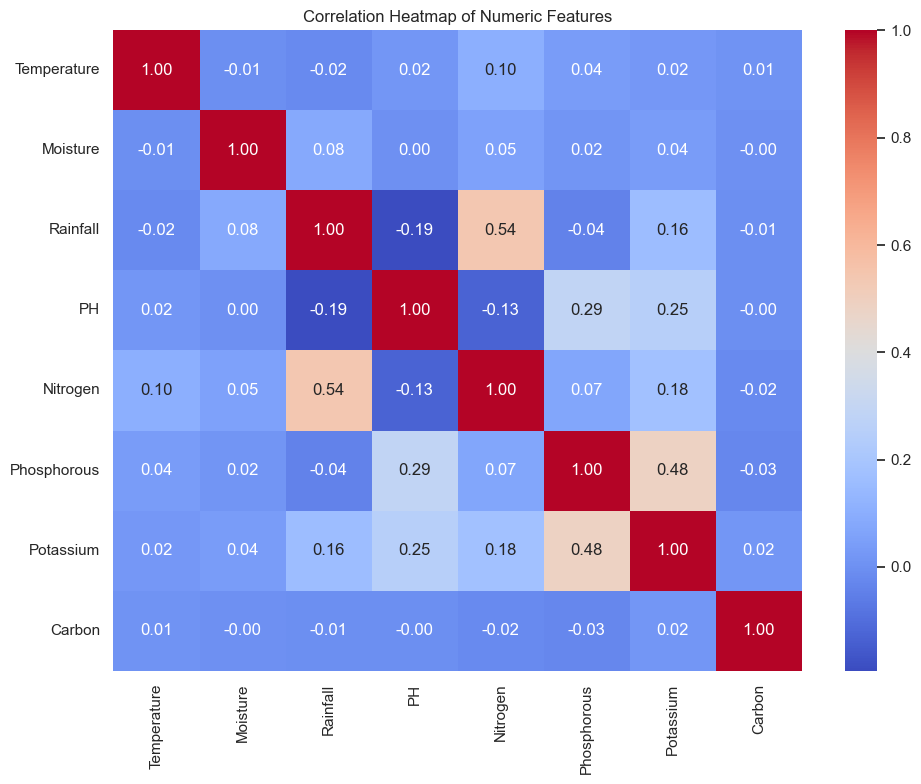

In [6]:
# Visualizations for numeric columns

# Select only numeric columns for correlation and histogram analysis
numeric_df = df.select_dtypes(include=[np.number])

# Check number of numeric columns before drawing a correlation heatmap
if numeric_df.shape[1] >= 4:
    plt.figure(figsize=(10, 8))
    correlation_matrix = numeric_df.corr()
    sns.heatmap(correlation_matrix, annot=True, fmt=".2f", cmap='coolwarm')
    plt.title('Correlation Heatmap of Numeric Features')
    plt.tight_layout()
    plt.show()
else:
    print("Not enough numeric columns for a correlation heatmap.")

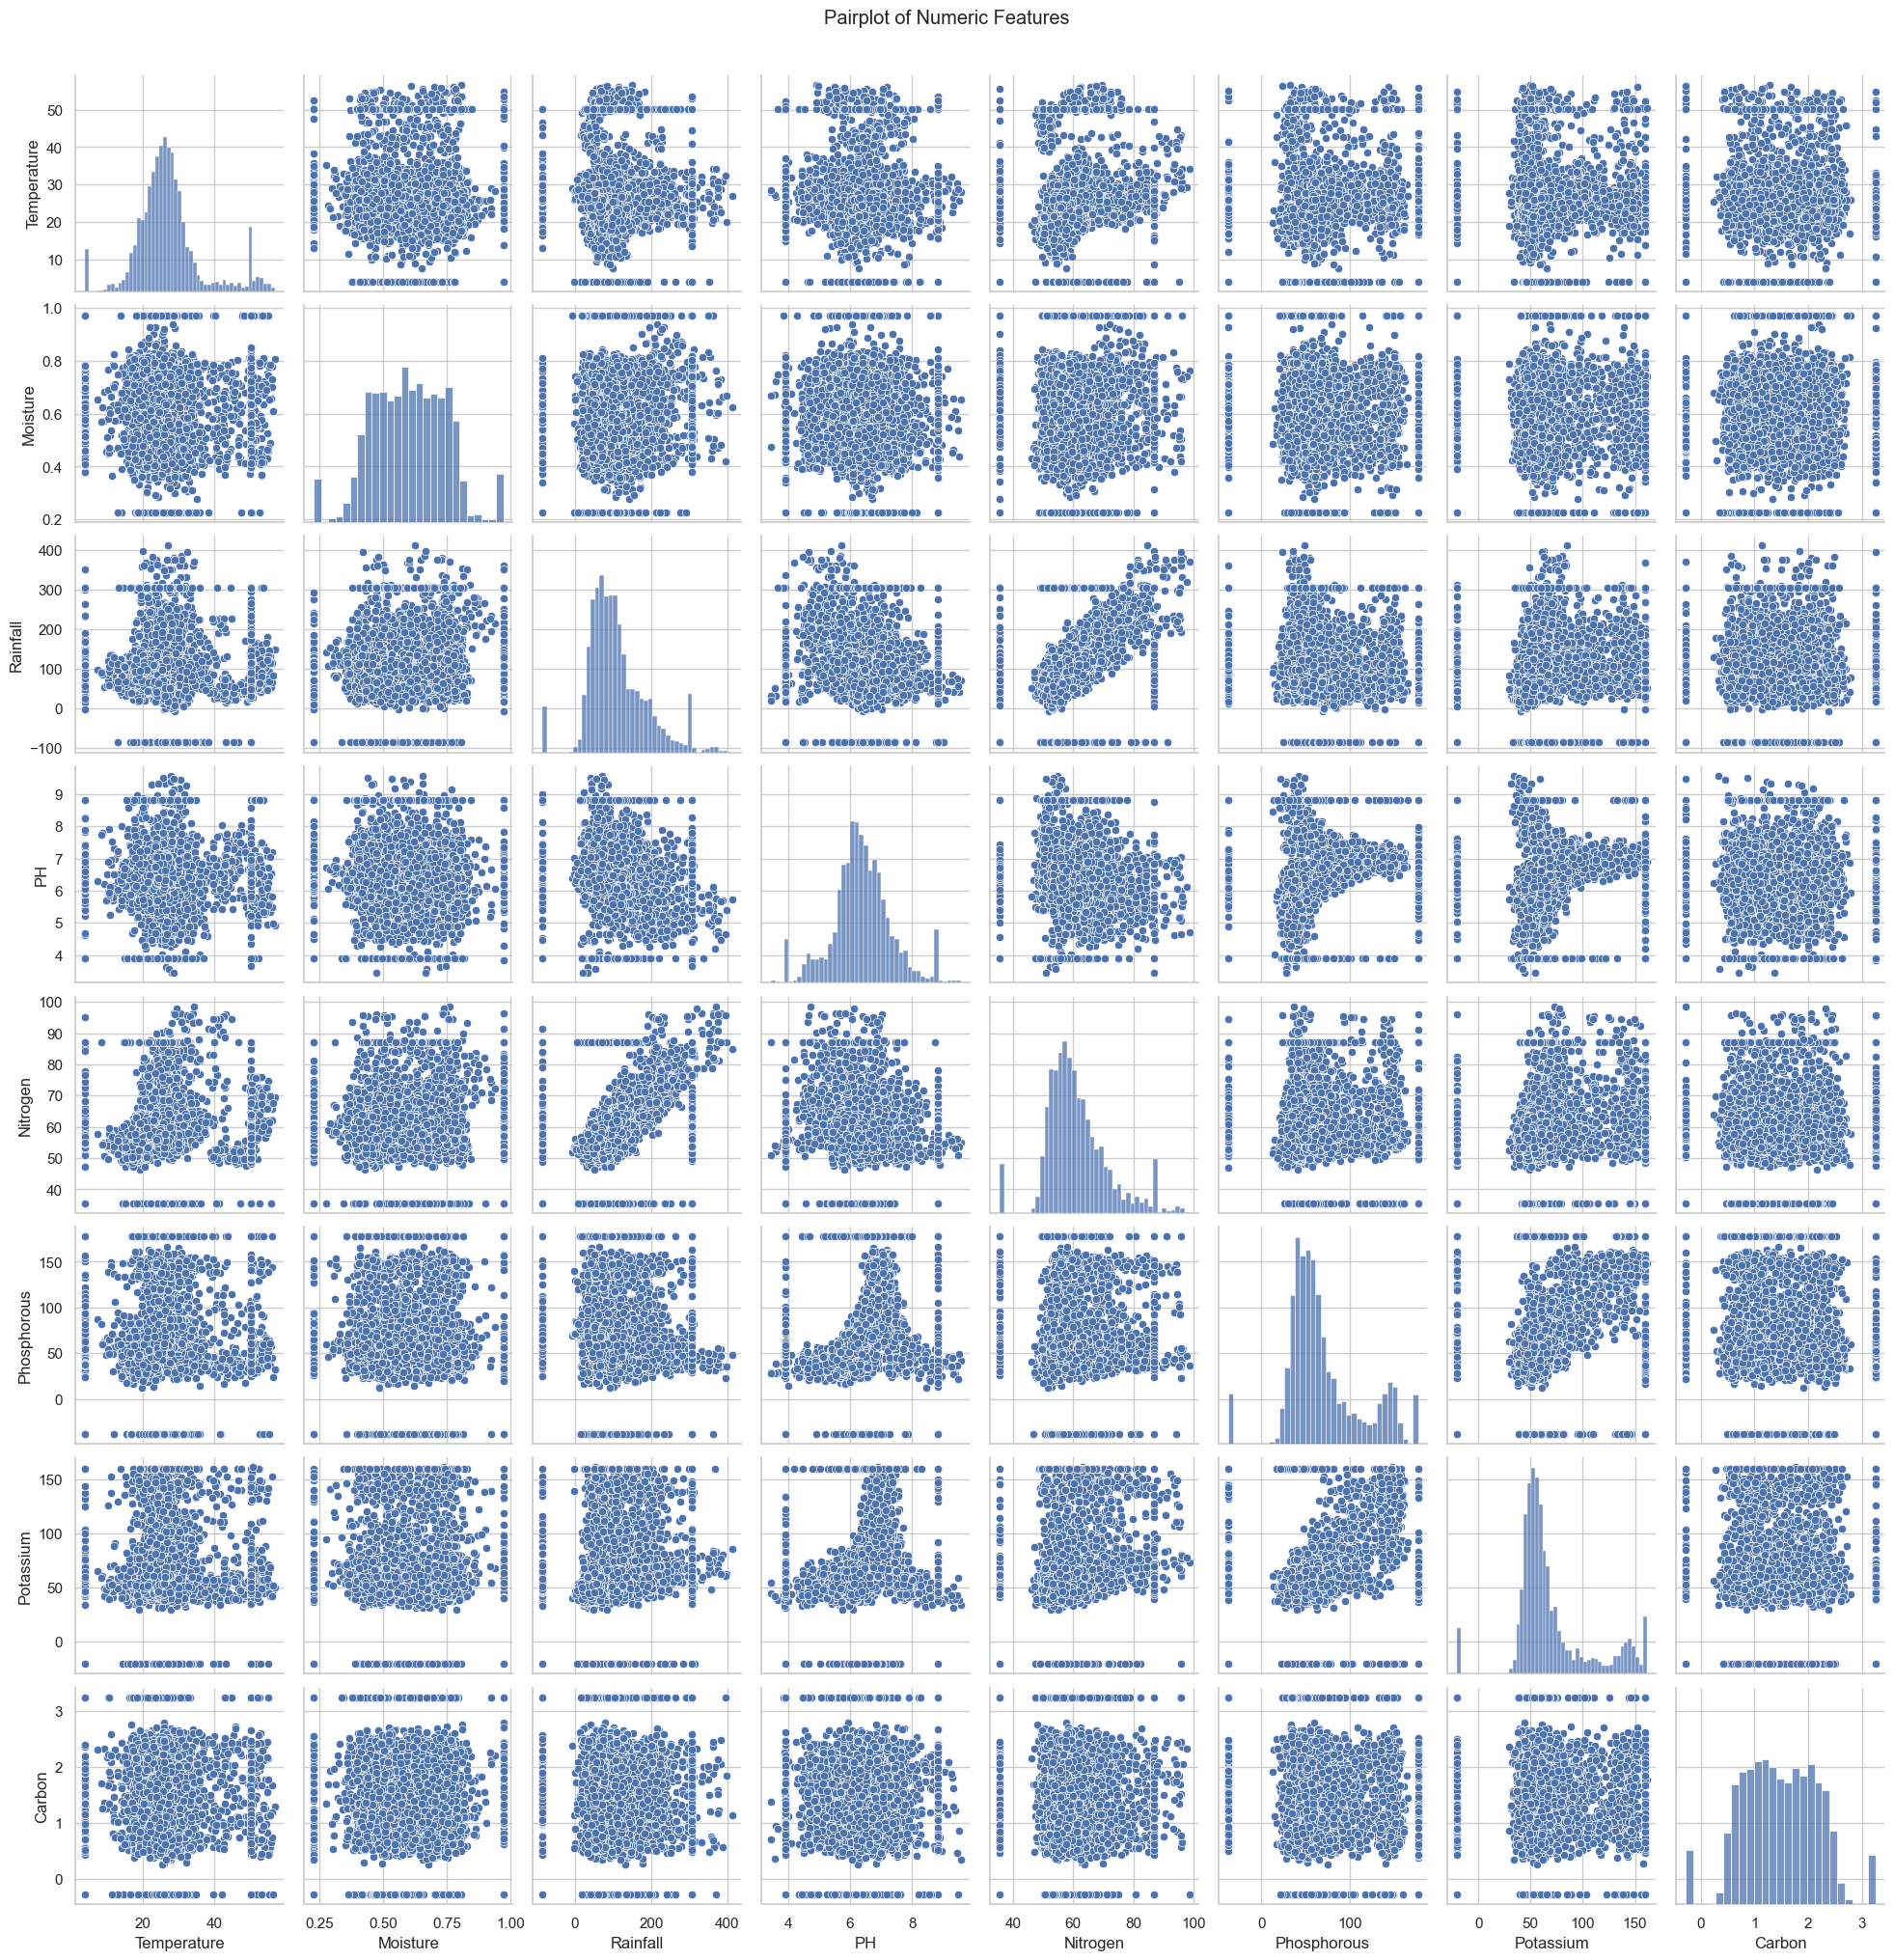

In [7]:
sns.pairplot(numeric_df)
plt.suptitle('Pairplot of Numeric Features', y=1.02)
plt.show()

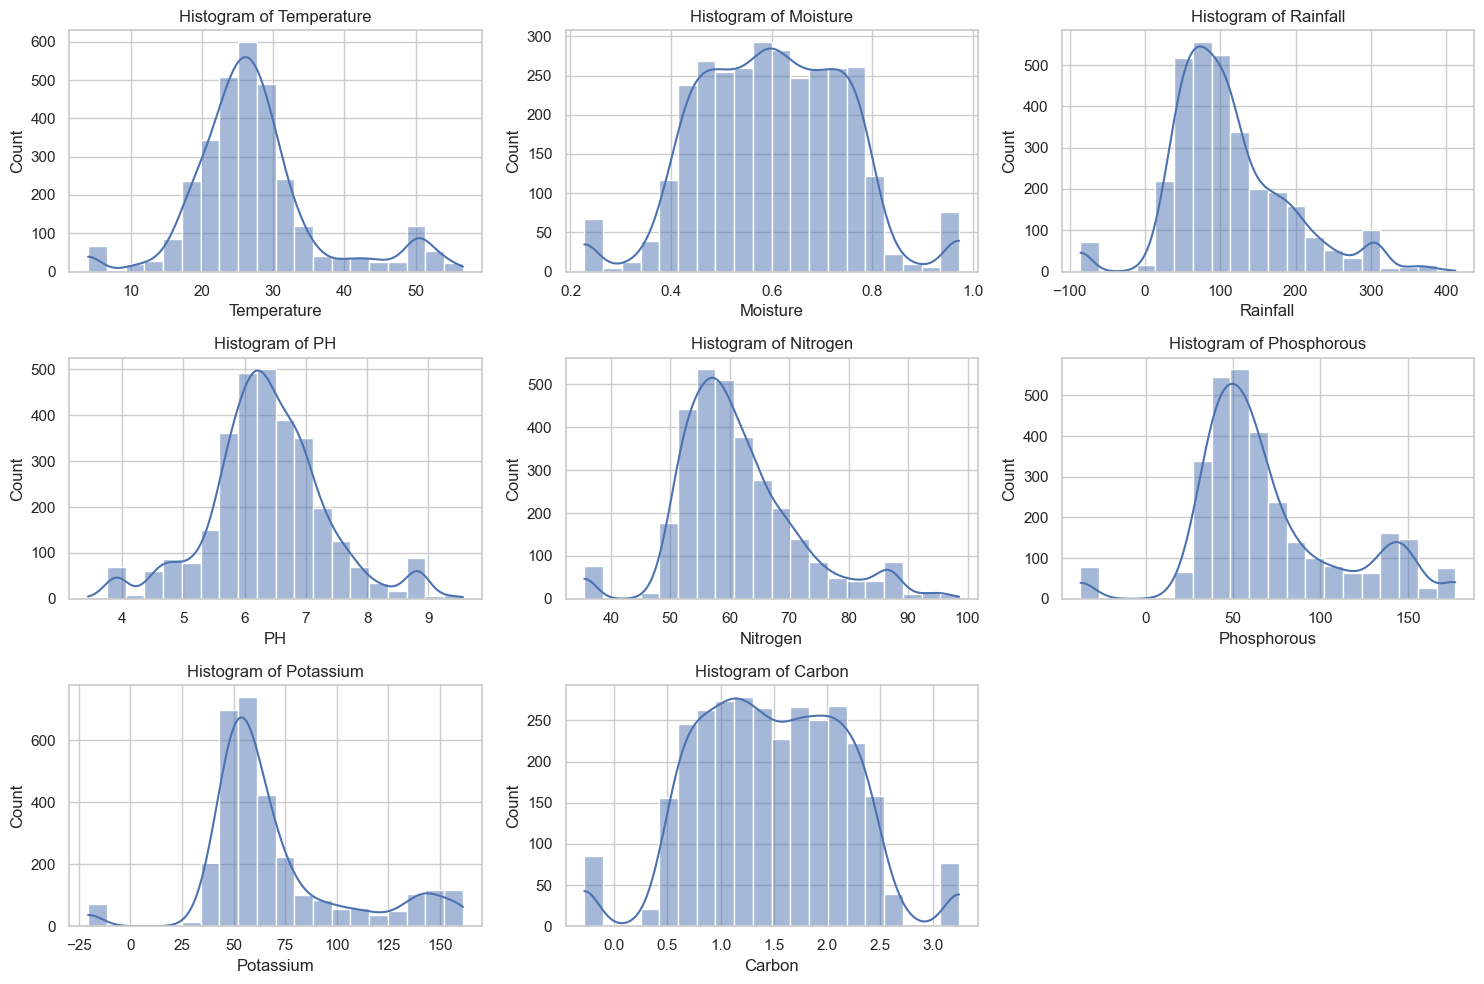

In [8]:
# Histograms for numeric features
numeric_columns = numeric_df.columns
plt.figure(figsize=(15, 10))
for i, col in enumerate(numeric_columns, 1):
    plt.subplot(3, 3, i)
    sns.histplot(numeric_df[col], kde=True, bins=20)
    plt.title(f'Histogram of {col}')
plt.tight_layout()
plt.show()

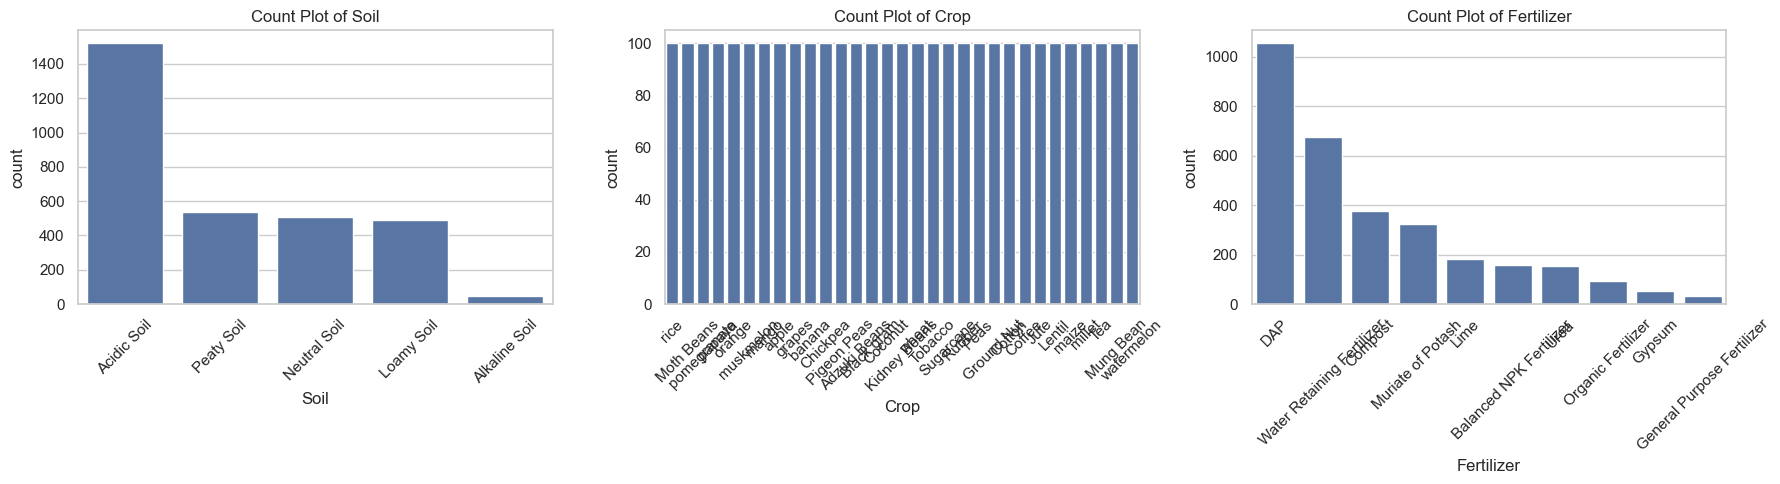

In [9]:
# Count plots for categorical features: Soil, Crop, Fertilizer
categorical_columns = ['Soil', 'Crop', 'Fertilizer']

plt.figure(figsize=(18, 5))
for i, col in enumerate(categorical_columns, 1):
    plt.subplot(1, 3, i)
    sns.countplot(data=df, x=col, order=df[col].value_counts().index)
    plt.title(f'Count Plot of {col}')
    plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [10]:
# Check for missing values
missing_values = df.isnull().sum()
print("Missing values in each column:\n", missing_values)

# If missing values exist, here is an example of how you might handle them
if missing_values.sum() > 0:
    # For simplicity, fill numeric missing values with median and categorical with mode
    for col in df.columns:
        if df[col].dtype in ['float64', 'int64']:
            df[col] = df[col].fillna(df[col].median())
        else:
            df[col] = df[col].fillna(df[col].mode()[0])
    print("Missing values were filled.")
else:
    print("No missing values detected.")

Missing values in each column:
 Temperature    0
Moisture       0
Rainfall       0
PH             0
Nitrogen       0
Phosphorous    0
Potassium      0
Carbon         0
Soil           0
Crop           0
Fertilizer     0
Remark         0
dtype: int64
No missing values detected.


In [11]:
# Encoding categorical features using LabelEncoder
# We'll encode 'Soil', 'Crop', and 'Fertilizer' for the prediction model
le_soil = LabelEncoder()
le_crop = LabelEncoder()
le_fertilizer = LabelEncoder()

df['Soil_encoded'] = le_soil.fit_transform(df['Soil'])
df['Crop_encoded'] = le_crop.fit_transform(df['Crop'])
df['Fertilizer_encoded'] = le_fertilizer.fit_transform(df['Fertilizer'])

# Let's quickly look at the encoded columns
df[['Soil', 'Soil_encoded', 'Crop', 'Crop_encoded', 'Fertilizer', 'Fertilizer_encoded']].head()

,Soil,Soil_encoded,Crop,Crop_encoded,Fertilizer,Fertilizer_encoded
0,Loamy Soil,2,rice,28,Compost,1
1,Loamy Soil,2,rice,28,Balanced NPK Fertilizer,0
2,Peaty Soil,4,rice,28,Water Retaining Fertilizer,9
3,Loamy Soil,2,rice,28,Balanced NPK Fertilizer,0
4,Peaty Soil,4,rice,28,Organic Fertilizer,7


Model Accuracy: 1.00


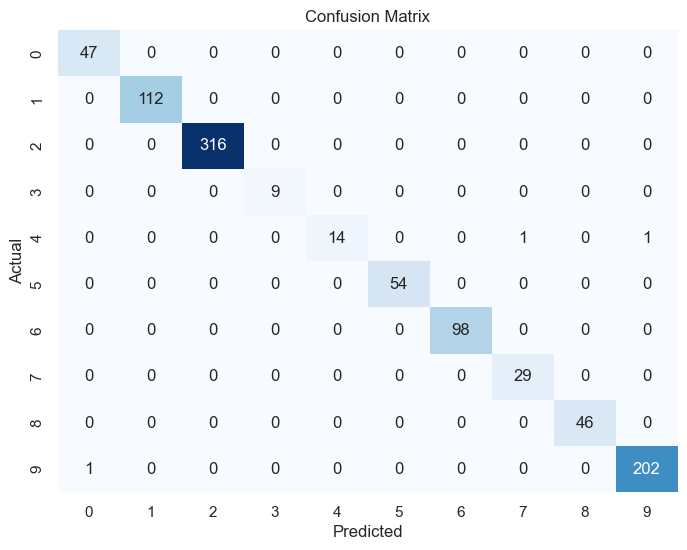

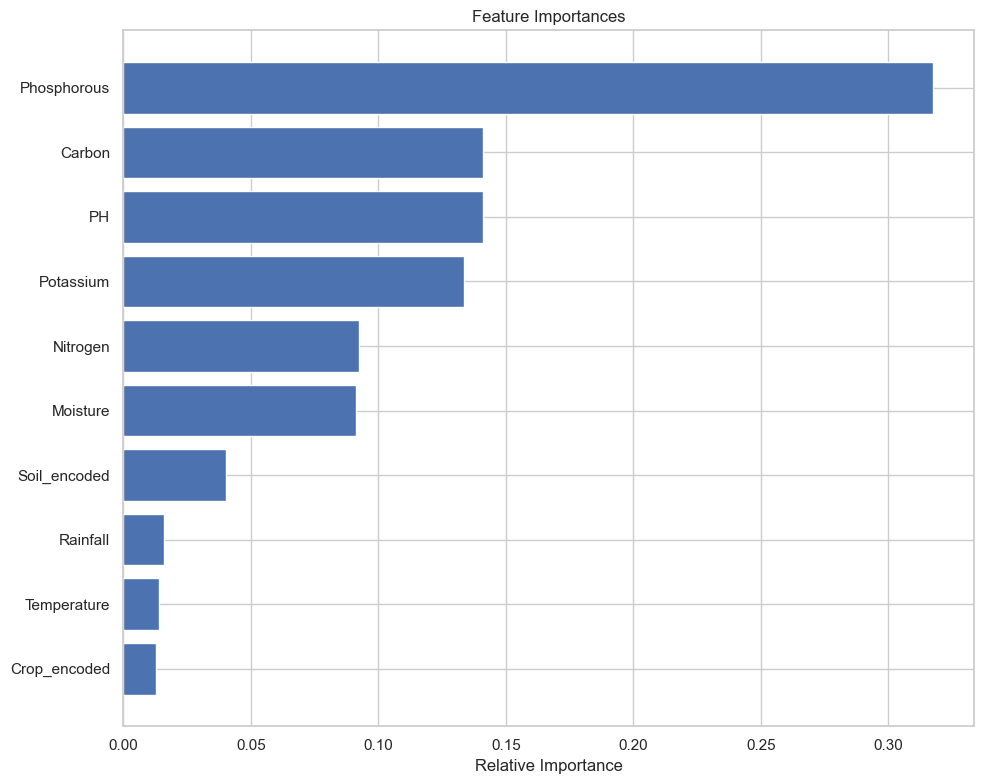

In [12]:
# We will attempt to predict the fertilizer recommendation based on environmental and soil data
# Features: Temperature, Moisture, Rainfall, PH, Nitrogen, Phosphorous, Potassium, Carbon, Soil_encoded, Crop_encoded
# Target: Fertilizer_encoded

# Define feature set X and target variable y
features = ['Temperature', 'Moisture', 'Rainfall', 'PH', 'Nitrogen', 'Phosphorous', 'Potassium', 'Carbon', 'Soil_encoded', 'Crop_encoded']
target = 'Fertilizer_encoded'

X = df[features]
y = df[target]

# Split the data using stratification by the target to ensure balanced classes
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# Create a RandomForest Classifier
clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model
clf.fit(X_train, y_train)

# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate prediction accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.2f}")

# Compute and plot the confusion matrix
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Permutation importance (a rough estimation using feature importances from Random Forest)
importances = clf.feature_importances_
indices = np.argsort(importances)

plt.figure(figsize=(10, 8))
plt.barh(range(len(indices)), importances[indices], align='center')
plt.yticks(range(len(indices)), [features[i] for i in indices])
plt.title('Feature Importances')
plt.xlabel('Relative Importance')
plt.tight_layout()
plt.show()